In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
HealthDesc = []

for i in df.columns:
    HealthDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum()) / len(df)) * 100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = HealthDesc, columns= [
                                'Data Feature',
    'Data Types',
    'Null',
    'Null Pct',
    'Unique',
    'Unique Sample'
] )

,Data Feature,Data Types,Null,Null Pct,Unique,Unique Sample
0,id,int64,0,0.0,381109,"[72542, 295578]"
1,Gender,object,0,0.0,2,"[Male, Female]"
2,Age,int64,0,0.0,66,"[46, 77]"
3,Driving_License,int64,0,0.0,2,"[0, 1]"
4,Region_Code,float64,0,0.0,53,"[46.0, 23.0]"
5,Previously_Insured,int64,0,0.0,2,"[1, 0]"
6,Vehicle_Age,object,0,0.0,3,"[> 2 Years, 1-2 Year]"
7,Vehicle_Damage,object,0,0.0,2,"[Yes, No]"
8,Annual_Premium,float64,0,0.0,48838,"[60208.0, 20888.0]"
9,Policy_Sales_Channel,float64,0,0.0,155,"[56.0, 3.0]"


In [4]:
df.drop(columns = 'id', inplace = True)

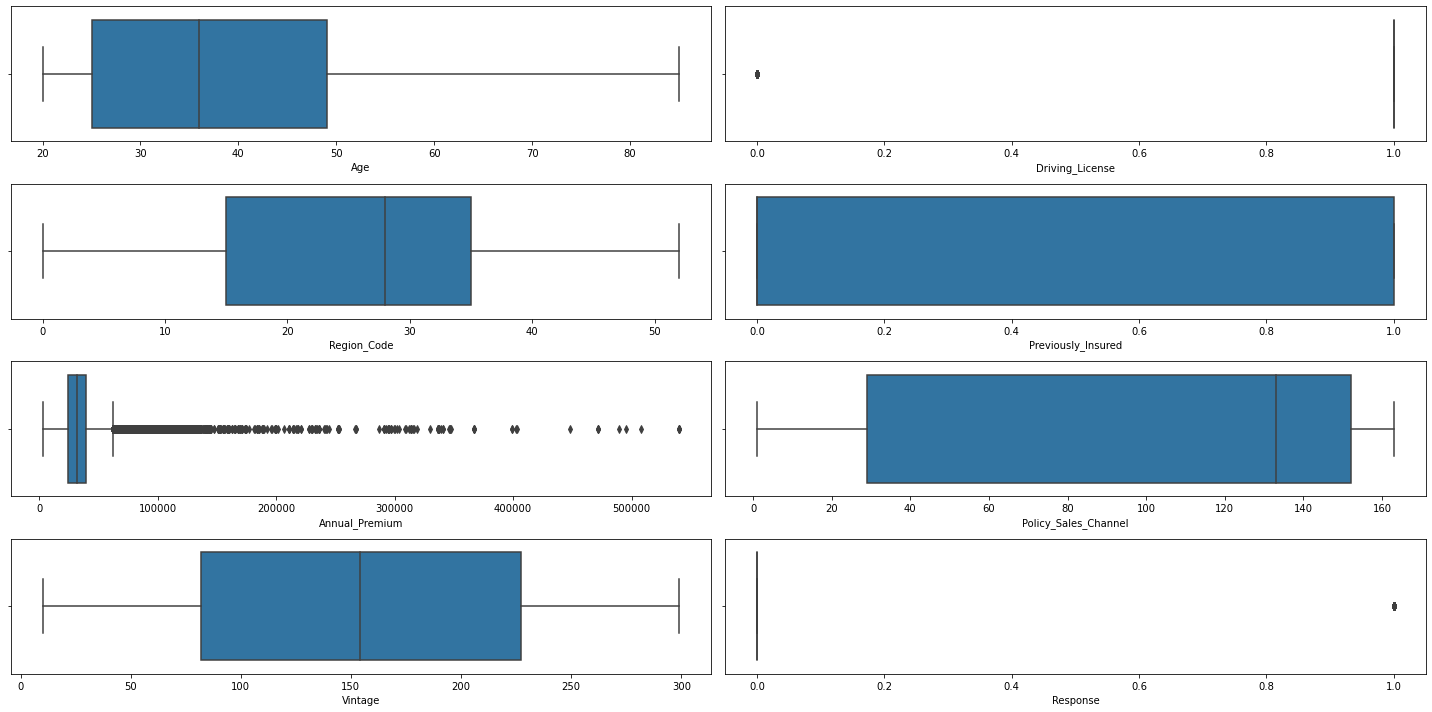

In [5]:
plt.figure(figsize = (20, 10))
x = 1 

for column in df.describe().columns:
    plt.subplot(4,2, x)
    sns.boxplot(df[column])
    x+=1 

plt.tight_layout()
plt.show()


### Encoding Gender

In [6]:
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Encoding Vehicle_Damage

In [7]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1, 'No':0})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


### Encoding Vehicle_Age

In [8]:
df['Vehicle_Age'] = df['Vehicle_Age'].map({'1-2 Year':1, '< 1 Year':0, '> 2 Years': 2})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [9]:
df['Response'].value_counts(normalize = True)

0    0.877437
1    0.122563
Name: Response, dtype: float64

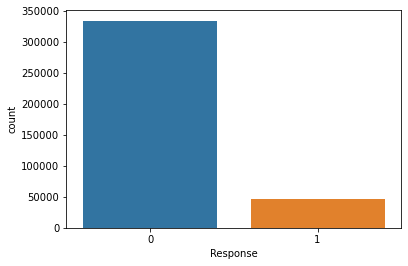

In [10]:
sns.countplot(df['Response'])
plt.show()
# Target Imbalance

### Correlation 

Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
Gender                 -0.052440
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

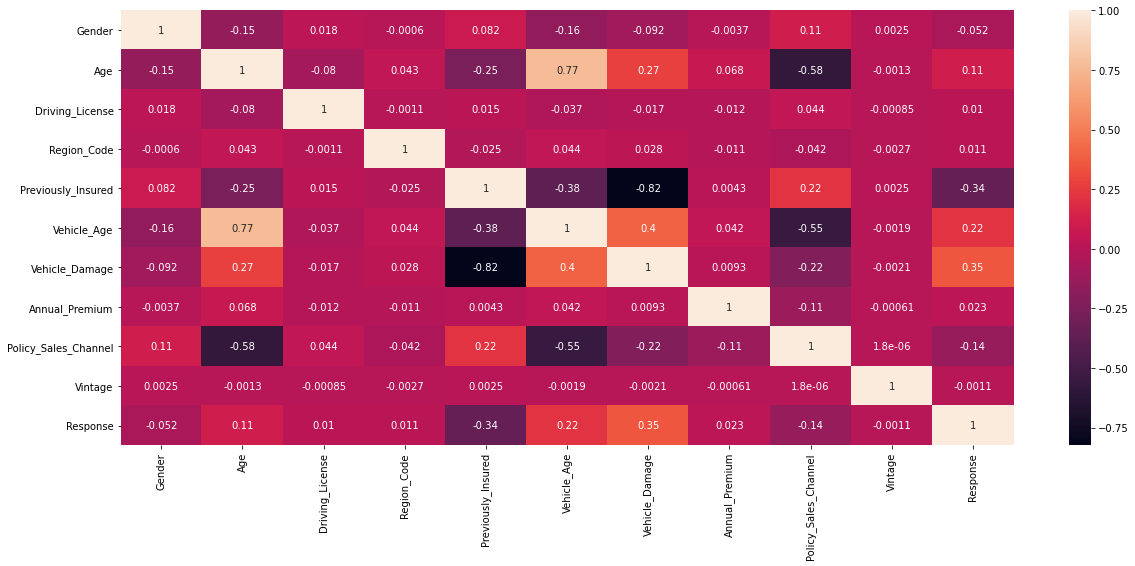

In [11]:
plt.figure(figsize = (20, 8))
sns.heatmap(df.corr(), annot = True)

correlation = df.corr()
display(correlation['Response'].sort_values(ascending = False)[1:])

### Model Building

In [12]:
X = df.drop(columns = ['Driving_License','Response', 'Region_Code', 'Policy_Sales_Channel', 'Gender', 'Vintage'] )
y = df['Response']

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 69, test_size = 0.2)

### Smote Process Since the data  Imbalance 

In [15]:
import imblearn
from imblearn.over_sampling import SMOTE

In [16]:
sm = SMOTE(random_state = 42)

In [17]:
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [18]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [19]:
df_smote = pd.concat([X_train_sm, y_train_sm], axis = 1)

In [20]:
df_smote['Response'].value_counts()

1    267555
0    267555
Name: Response, dtype: int64

### Logistic Regression Model Building

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
modelSMOTE = LogisticRegression()

In [23]:
modelSMOTE.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [24]:
y_pred_SMOTE_logreg = modelSMOTE.predict(X_test)

In [25]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, confusion_matrix, classification_report

In [26]:
acc_logreg = accuracy_score(y_test, y_pred_SMOTE_logreg)
recall_logreg = recall_score(y_test, y_pred_SMOTE_logreg)
prec_logreg = precision_score(y_test, y_pred_SMOTE_logreg)
f1_logreg = f1_score(y_test, y_pred_SMOTE_logreg)
print(classification_report(y_test, y_pred_SMOTE_logreg))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     66844
           1       0.25      0.97      0.40      9378

    accuracy                           0.65     76222
   macro avg       0.62      0.79      0.58     76222
weighted avg       0.90      0.65      0.71     76222



In [27]:
cm_smote_log_reg = confusion_matrix(y_test, y_pred_SMOTE_logreg, labels = [1,0])

In [28]:
df_smote_logreg = pd.DataFrame(data = cm_smote_log_reg , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_smote_logreg

,Prediksi 1,Prediksi 0
Aktual 1,9101,277
Aktual 0,26637,40207


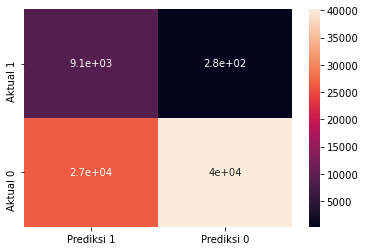

In [29]:
sns.heatmap(df_smote_logreg, annot = True)

## Logistic Regression base model has  False Negative amount of 277

### Decision Tree 

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
modelSMOTEDT = DecisionTreeClassifier()

In [32]:
modelSMOTEDT.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier()

In [33]:
y_pred_SMOTE_DT = modelSMOTEDT.predict(X_test)

In [34]:
acc_DT = accuracy_score(y_test,y_pred_SMOTE_DT)
prec_DT = precision_score(y_test, y_pred_SMOTE_DT)
rec_DT = recall_score(y_test, y_pred_SMOTE_DT)
f1_DT = f1_score(y_test, y_pred_SMOTE_DT)

print(classification_report(y_test, y_pred_SMOTE_DT))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     66844
           1       0.27      0.57      0.37      9378

    accuracy                           0.76     76222
   macro avg       0.60      0.68      0.61     76222
weighted avg       0.85      0.76      0.79     76222



In [35]:
cm_DT = confusion_matrix(y_test, y_pred_SMOTE_DT, labels = [1,0])
df_DT = pd.DataFrame(data = cm_DT , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_DT

,Prediksi 1,Prediksi 0
Aktual 1,5316,4062
Aktual 0,14407,52437


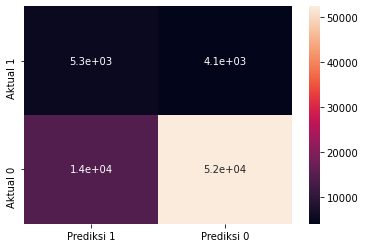

In [36]:
sns.heatmap(df_DT, annot = True)

## Decision Tree Classifier base model has  False Negative amount of 4071

## XGB

In [37]:
import xgboost as xgb

In [38]:
modelSMOTEXGB = xgb.XGBClassifier()

In [39]:
modelSMOTEXGB.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
y_pred_SMOTE_XGB = modelSMOTEXGB.predict(X_test)

In [41]:
acc_XGB = accuracy_score(y_test,y_pred_SMOTE_XGB)
prec_XGB = precision_score(y_test, y_pred_SMOTE_XGB)
rec_XGB = recall_score(y_test, y_pred_SMOTE_XGB)
f1_XGB = f1_score(y_test, y_pred_SMOTE_XGB)

print(classification_report(y_test, y_pred_SMOTE_XGB))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     66844
           1       0.28      0.85      0.42      9378

    accuracy                           0.72     76222
   macro avg       0.63      0.77      0.62     76222
weighted avg       0.89      0.72      0.76     76222



In [42]:
cm_XGB = confusion_matrix(y_test, y_pred_SMOTE_XGB, labels = [1,0])
df_XGB = pd.DataFrame(data = cm_XGB , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_XGB

,Prediksi 1,Prediksi 0
Aktual 1,7990,1388
Aktual 0,20311,46533


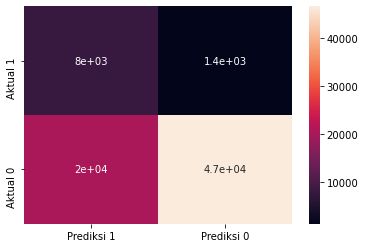

In [43]:
sns.heatmap(df_XGB, annot = True)
## XGBoost Classifier base model has  False Negative amount of 1388

### Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
modelSMOTERF = RandomForestClassifier()

In [46]:
modelSMOTERF.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [47]:
y_pred_SMOTE_RF = modelSMOTERF.predict(X_test)

In [48]:
acc_RF = accuracy_score(y_test,y_pred_SMOTE_RF)
prec_RF = precision_score(y_test, y_pred_SMOTE_RF)
rec_RF = recall_score(y_test, y_pred_SMOTE_RF)
f1_RF = f1_score(y_test, y_pred_SMOTE_RF)

print(classification_report(y_test, y_pred_SMOTE_RF))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84     66844
           1       0.27      0.62      0.37      9378

    accuracy                           0.75     76222
   macro avg       0.60      0.69      0.61     76222
weighted avg       0.85      0.75      0.78     76222



In [49]:
cm_RF = confusion_matrix(y_test, y_pred_SMOTE_RF, labels = [1,0])
df_RF = pd.DataFrame(data = cm_RF , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_RF

,Prediksi 1,Prediksi 0
Aktual 1,5801,3577
Aktual 0,15833,51011


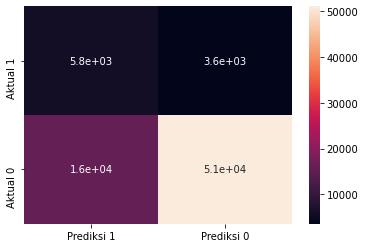

In [50]:
sns.heatmap(df_RF, annot = True)
## Random Forest Classifier base model has  False Negative amount of 3572

In [51]:
eva_met = {
    "LogisticReg": [acc_logreg,prec_logreg,recall_logreg,f1_logreg],
    "DecisionTree": [acc_DT, prec_DT, rec_DT, f1_DT],
    "XGB": [acc_XGB, prec_XGB, rec_XGB, f1_XGB],
    "RandomForest" : [acc_RF, prec_RF, rec_RF, f1_RF]
    }

eva = pd.DataFrame(data = eva_met, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
eva

# From this Evaluation MAtrix it shows that logistic Regression has the best Recall Score for the base model

,LogisticReg,DecisionTree,XGB,RandomForest
Accuracy,0.646900,0.757695,0.715318,0.745349
Precision,0.254659,0.269533,0.282322,0.268143
Recall,0.970463,0.566859,0.851994,0.618575
F1-Score,0.403449,0.365348,0.424109,0.374113


### HyperParameter Tuning

#### Logistic Regression

In [52]:
logreg_tuning = LogisticRegression()
param_logreg = {'C': [1, 0.5, 0.1, 5, 9],
               'penalty':['l2','l1', 'elasticnet']}

In [53]:
model_logreg_tuned = GridSearchCV(estimator = logreg_tuning, param_grid = param_logreg, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')

In [54]:
model_logreg_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    9.7s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='recall', verbose=1)

In [55]:
logreg_tuned = model_logreg_tuned.best_estimator_

In [56]:
y_tuned_logreg = logreg_tuned.predict(X_test)

In [57]:
cm_logreg_tuned = confusion_matrix(y_test, y_tuned_logreg, labels = [1,0])

In [58]:
acc_logreg_tuned = accuracy_score(y_test, y_tuned_logreg)
prec_logreg_tuned = precision_score(y_test, y_tuned_logreg)
rec_logreg_tuned = recall_score(y_test, y_tuned_logreg)
f1_logreg_tuned = f1_score(y_test,y_tuned_logreg)

print(classification_report(y_test, y_tuned_logreg))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     66844
           1       0.25      0.97      0.40      9378

    accuracy                           0.65     76222
   macro avg       0.62      0.79      0.58     76222
weighted avg       0.90      0.65      0.71     76222



In [59]:
df_logreg_tuned = pd.DataFrame(data = cm_logreg_tuned , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_logreg_tuned

,Prediksi 1,Prediksi 0
Aktual 1,9102,276
Aktual 0,26640,40204


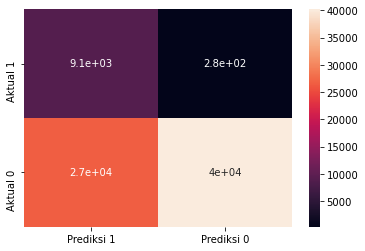

In [60]:
sns.heatmap(df_logreg_tuned, annot = True)

# Logreg Recall score doesn't change after hyper parameter tuning

### Decision Tree Classifier Tuning

In [61]:
DT_tuning = DecisionTreeClassifier()
param_DT =  {
    "max_depth": [None, 4,9,15,20,50],
    "min_samples_leaf": [ 1,4,0.1,2,10],
    "max_features" : [None, 0.2, 0.8, 2.0],
    "min_samples_split": [2,9,15,25]}

In [62]:
model_DT_tuned = GridSearchCV(estimator = DT_tuning, param_grid = param_DT, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')

In [63]:
model_DT_tuned.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  4.3min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 9, 15, 20, 50],
                         'max_features': [None, 0.2, 0.8, 2.0],
                         'min_samples_leaf': [1, 4, 0.1, 2, 10],
                         'min_samples_split': [2, 9, 15, 25]},
             scoring='recall', verbose=1)

In [64]:
DT_tuned = model_DT_tuned.best_estimator_

In [65]:
y_tuned_DT = DT_tuned.predict(X_test)

In [66]:
cm_DT_tuned = confusion_matrix(y_test, y_tuned_DT, labels = [1,0])

In [67]:
acc_DT_tuned = accuracy_score(y_test, y_tuned_DT)
prec_DT_tuned = precision_score(y_test, y_tuned_DT)
rec_DT_tuned = recall_score(y_test, y_tuned_DT)
f1_DT_tuned = f1_score(y_test,y_tuned_DT)

print(classification_report(y_test, y_tuned_DT))

              precision    recall  f1-score   support

           0       0.98      0.64      0.78     66844
           1       0.26      0.90      0.41      9378

    accuracy                           0.68     76222
   macro avg       0.62      0.77      0.59     76222
weighted avg       0.89      0.68      0.73     76222



In [68]:
df_DT_tuned = pd.DataFrame(data = cm_DT_tuned , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_DT_tuned

,Prediksi 1,Prediksi 0
Aktual 1,8469,909
Aktual 0,23855,42989


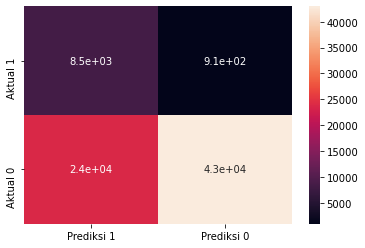

In [69]:
sns.heatmap(df_DT_tuned, annot = True)

# Recall 1 goes up high with this model however False Positve goes up as well

## XGB

In [79]:
XGB_tuning = xgb.XGBClassifier()
param_XGB = {'max_depth':[3,6,8],
             'min_child_weight':[1,3,6],
             'subsample':[1,0.5,0.3],
             'gamma':[0,3,5]}

In [80]:
model_XGB_tuned = RandomizedSearchCV(estimator=XGB_tuning, param_distributions=param_XGB,scoring = 'recall', verbose = 1, n_jobs = -1,cv = 3)

In [81]:
model_XGB_tuned.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.4min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                          

In [82]:
XGB_tuned = model_XGB_tuned.best_estimator_
model_XGB_tuned.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
y_tuned_XGB = XGB_tuned.predict(X_test)

In [84]:
cm_XGB_tuned = confusion_matrix(y_test, y_tuned_XGB, labels = [1,0])

In [85]:
acc_XGB_tuned = accuracy_score(y_test, y_tuned_XGB)
prec_XGB_tuned = precision_score(y_test, y_tuned_XGB)
rec_XGB_tuned = recall_score(y_test, y_tuned_XGB)
f1_XGB_tuned = f1_score(y_test,y_tuned_XGB)

print(classification_report(y_test, y_tuned_XGB))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     66844
           1       0.28      0.85      0.42      9378

    accuracy                           0.72     76222
   macro avg       0.63      0.77      0.62     76222
weighted avg       0.89      0.72      0.76     76222



In [86]:
df_XGB_tuned = pd.DataFrame(data = cm_XGB_tuned , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_XGB_tuned

,Prediksi 1,Prediksi 0
Aktual 1,7954,1424
Aktual 0,20141,46703


### Random Forest

In [70]:
RF_tuning = RandomForestClassifier()
param_DT =  {
    "n_estimators":[100,500,1000],
    "max_depth": [None, 4,6,8],
    "min_samples_leaf": [1,0.06,3,5],
    "min_samples_split" : [2,9,15,25],
    "max_features" : ['auto','sqrt', 'log2'],
    "criterion": ['gini', 'entropy']}

In [71]:
model_RF_tuned = RandomizedSearchCV(estimator=RF_tuning, param_distributions=param_DT,scoring = 'recall', verbose = 1, n_jobs = -1,cv = 3)

In [72]:
model_RF_tuned.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 32.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 4, 6, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 0.06, 3, 5],
                                        'min_samples_split': [2, 9, 15, 25],
                                        'n_estimators': [100, 500, 1000]},
                   scoring='recall', verbose=1)

In [73]:
RF_tuned = model_RF_tuned.best_estimator_
model_RF_tuned.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=0.06, min_samples_split=15,
                       n_estimators=1000)

In [74]:
y_tuned_RF = RF_tuned.predict(X_test)

In [75]:
cm_RF_tuned = confusion_matrix(y_test, y_tuned_RF, labels = [1,0])

In [76]:
acc_RF_tuned = accuracy_score(y_test, y_tuned_RF)
prec_RF_tuned = precision_score(y_test, y_tuned_RF)
rec_RF_tuned = recall_score(y_test, y_tuned_RF)
f1_RF_tuned = f1_score(y_test,y_tuned_RF)

print(classification_report(y_test, y_tuned_RF))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79     66844
           1       0.27      0.92      0.42      9378

    accuracy                           0.69     76222
   macro avg       0.63      0.79      0.60     76222
weighted avg       0.90      0.69      0.74     76222



In [77]:
df_RF_tuned = pd.DataFrame(data = cm_RF_tuned , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_RF_tuned

,Prediksi 1,Prediksi 0
Aktual 1,8669,709
Aktual 0,23055,43789


sns.heatmap(df_RF_tuned, annot = True)

In [87]:
eva_mat_tuned = {
    "LogisticReg": [acc_logreg_tuned, prec_logreg_tuned, rec_logreg_tuned, f1_logreg_tuned],
    "XGB": [acc_XGB_tuned, prec_XGB_tuned, rec_XGB_tuned, f1_XGB_tuned],
    "DecisionTree": [acc_DT_tuned, prec_DT_tuned, rec_DT_tuned, f1_DT_tuned],
    "RandomForest" : [acc_RF_tuned, prec_RF_tuned, rec_RF_tuned, f1_RF_tuned]
    }

eva_tuned = pd.DataFrame(data = eva_mat_tuned, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
eva_tuned

,LogisticReg,XGB,DecisionTree,RandomForest
Accuracy,0.646874,0.717076,0.675107,0.688226
Precision,0.254658,0.283111,0.262003,0.273263
Recall,0.970569,0.848155,0.903071,0.924398
F1-Score,0.403457,0.424519,0.406168,0.421829


## Conclusion
- Logreg Recall score doesn't change after hyper parameter tuning
- Logistic regression base model and tuned model has the same recall score 
- Decision Tree Recall 1 goes up high with this model however False Positve goes up as well
- Decision Tree Recall Score Goes up by 0.3 after Hyper Param Tuning
- Random Forest Classifier Recall Score goes up after hyper parameter tuning 
- Random Forest Classifier Recall score goes up by 27 %